# Bayesian statistics

### The mounty hall problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Array of possible Ferrari positions
p = np.array([0, 1, 2])

#Number of competitions simulated
N = 100000

Ferrari = np.random.randint(0, 3, N)           #Ferrari position
conservative = np.random.randint(0, 3, N)      #Conervative choice
switcher = np.random.randint(0, 3, N)          #Switcher choice
new_comer = np.empty(N)                        #Newcomer choice

for i in range(N):
    show = np.random.randint(0, 2)                                  #shown goat
    
    switcher[i] = np.where(switcher[i] == Ferrari[i], p[p != Ferrari[i]][show], Ferrari[i])         #switch to a door different from the first choice and from the shown door
    
    new_comer[i] = p[p != p[p != Ferrari[i]][show]][np.random.randint(0, 2)]      #choice of the newcomer after the show door was opened

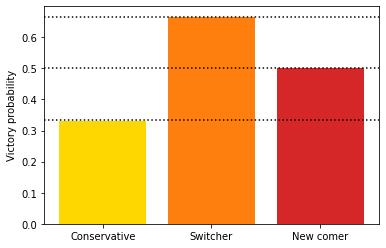

In [3]:
#victory probabilities
p_c = len(conservative[conservative==Ferrari])/N 
p_s = len(switcher[switcher==Ferrari])/N 
p_n = len(new_comer[new_comer==Ferrari])/N

plt.bar([0,1,2], [p_c, p_s, p_n], color=['gold', 'tab:orange', 'tab:red']);
plt.xticks([0,1,2], ['Conservative', 'Switcher', 'New comer']);
plt.ylabel('Victory probability')

for y in [1/3,1/2,2/3]:
    plt.axhline(y, ls='dotted',c='black')

### Transformations of random variables

Text(0, 0.5, 'p(x)')

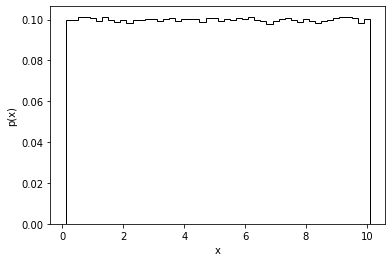

In [4]:
#x uniformly distributed
N = 1000000
x = np.random.random(N)*10+0.1
x_hist = plt.hist(x, bins=50, histtype='step', color='black', density=True)
plt.xlabel('x')
plt.ylabel('p(x)')

In [5]:
#logaritm of the uniform distribution
y = np.log10(x)

Analytical distribution p(y):
\begin{equation}
p(y) = |\frac{dx}{dy}|p(y) = \frac{log(10)\cdot10^{y}}{10}
\end{equation}

Text(0, 0.5, 'p(y)')

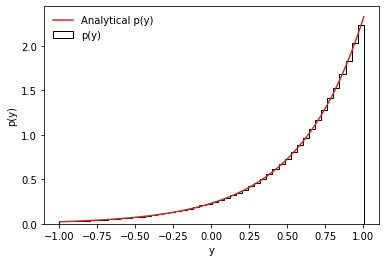

In [7]:
y_hist = plt.hist(y, bins=50, histtype='step', color='black', density=True, label = 'p(y)')
plt.plot(y_hist[1], 10**y_hist[1]*np.log(10)/10, color='tab:red', label='Analytical p(y)')
plt.legend(frameon=False)
plt.xlabel('y')
plt.ylabel('p(y)')

In [8]:
print(f'means:{np.log10(np.mean(x)):.3f}, {np.mean(y):.3f}')
print(f'medians:{np.log10(np.median(x)):.3f}, {np.median(y):.3f}')

means:0.707, 0.590
medians:0.707, 0.707
